# Ethereum Data Analysis

## Import necessary libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
import statsmodels.regression.linear_model as sm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')

In [2]:
crypt_df = pd.read_csv("ethereum.csv", parse_dates=['Date'])

In [3]:
crypt_df.head()

,Date,Supply,MarketCap,Price,Addresses,Transactions,GasPriceHistory,GasConsumed,BlockSize,BlockRewards,BlockDifficulty
0,2015-07-30,72049306.59,0.0,0,9205,8893,0.0,0,644,39316.09375,0.121
1,2015-07-31,72085498.31,0.0,0,9361,0,0.0,0,582,36191.71875,0.603
2,2015-08-01,72113204.25,0.0,0,9476,0,0.0,0,575,27705.93750,0.887
3,2015-08-02,72141427.69,0.0,0,9563,0,0.0,0,581,28223.43750,1.020
4,2015-08-03,72169404.41,0.0,0,9639,0,0.0,0,587,27976.71875,1.126


In [4]:
crypt_df.tail()

,Date,Supply,MarketCap,Price,Addresses,Transactions,GasPriceHistory,GasConsumed,BlockSize,BlockRewards,BlockDifficulty
1159,2018-10-01,102309434.8,23622.22541,230.89,43504621,476308,1.894101e+10,38550173670,24593,20302.40625,3240.653
1160,2018-10-02,102329949.0,23066.19381,225.41,43554108,490262,1.903487e+10,39210756138,24107,20514.18750,3211.925
1161,2018-10-03,102350244.5,22513.98328,219.97,43618192,559006,1.324871e+10,40441198221,21423,20295.46875,3226.085
1162,2018-10-04,102370614.1,22701.70739,221.76,43680143,559181,1.325410e+10,40791755826,22655,20369.62500,3261.753
1163,2018-10-05,102390791.2,23334.86131,227.9,43750049,595361,1.356843e+10,39567592626,20849,20177.06250,3277.001


We use the *parse_dates* attributes of pd.read_csv to read the 'Date' column as datetime object. Let's find out how many data samples and features we have in our dataset. The dataset is a collection of daily data of ethereum network for almost three years (2015 to 2018). 

In [5]:
crypt_df.shape

(1164, 11)

In [6]:
crypt_df.dtypes

Date               datetime64[ns]
Supply                    float64
MarketCap                 float64
Price                      object
Addresses                   int64
Transactions                int64
GasPriceHistory           float64
GasConsumed                 int64
BlockSize                   int64
BlockRewards              float64
BlockDifficulty           float64
dtype: object

Only the feature 'Price' is of object type. Let's look at some values of this feature.

In [7]:
# unique values in the feature 'Price'
crypt_df['Price'].unique()[:10]

array(['0', '3', '1.2', '0.99', '1.29', '1.88', '1.79', '1.3', '1.37',
       '1.36'], dtype=object)

Clearly, we should convert these values from object type to float type.

In [8]:
# convert from object type to float type. Remove ',' if present and then convert to float
crypt_df['Price'] = crypt_df['Price'].apply(lambda x: float(re.sub(',', '', x)))

ETH is the lifeblood of Ethereum. When you send ETH or use an Ethereum application, you'll pay a small fee in ETH to use the Ethereum network. This fee is an incentive for a miner to process and verify what you're trying to do.

Miners are like the record-keepers of Ethereum – they check and prove that no one is cheating. Miners who do this work are also rewarded with small amounts of newly-issued ETH.

The work miners do keeps Ethereum secure and free of centralized control.

Source : https://ethereum.org/en/eth/

The following information about the features are available:

- Supply - total number of ether (digital currency of ethereum network) in circulation.

- Price - market price (close) of ethereum cryptocurrency.

- Market Cap - it is calculated as (supply * price). In simple terms, it is the market value of a company.

- Addresses - total number of unique addresses. It basically gives us an idea about how many pepople are getting involved on the ethereum platform.

- Transactions - total number of daily transactions on ethereum platform.

- GasPriceHistory - price of making a transaction on ethereum platform.

- GasConsumed - amount of gas consumed during executing the transactions.

- Block Size - Ethereum imposes a gas limit instead of a block size, helps manage growth of the network; if block size is too large and network grows too large then there's fear the network will be more centralized because of increased cost of running full node (among other concerns) 

- Block Rewards - It is the total amount of Ether (ETH) given to the addresses which mined blocks. In other words, it is the rewards given to the miners for verifying transactions (https://docs.ethhub.io/using-ethereum/mining/).

- Block Difficulty - hashes needed for miners to solve blocks, as more miners join network the difficulty goes up so blocks aren't mined too fast 

## Exploratory data analysis 

In [22]:
def plot_features(df, feature1, feature2, fig_width, fig_height, log_scale=False):
    
    """
    A function to generate plots.
    
    Parameters
    ------------
    df : pandas dataframe
       the input dataframe
       
    feature1 : str
       the feature to be plotted along the x-axis
       
    feature2 : str
       the feature to be plotted along the y-axis
       
    fig_width : int
       width of the figure
       
    fig_height : int
       height of the figure
       
    log_scale : bool
       specifies whether to set log scale along an axis
       
    Returns
    ---------
    None
    
    """
    
    plt.figure(figsize=(fig_width, fig_height))
    plt.plot(df[feature1], df[feature2])
    if log_scale:
        plt.yscale("log")
    plt.xlabel(feature1)
    plt.ylabel(feature2)

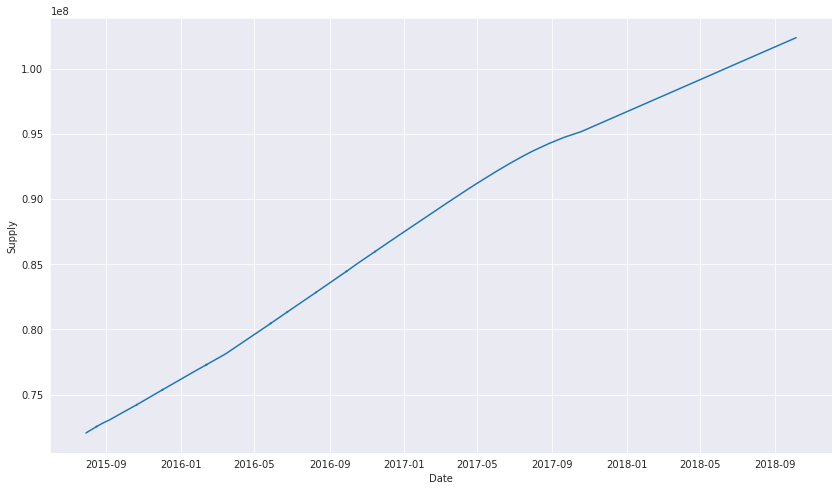

In [23]:
# how does the supply of ether have changed over time?
plot_features(crypt_df, 'Date', 'Supply', 14, 8)

So between 2015 and 2018, the total circulation of ether has seen a steady increase.

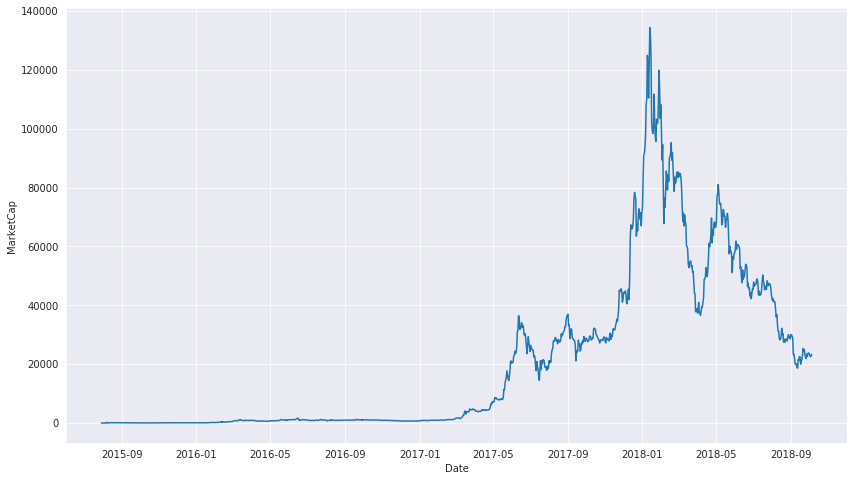

In [24]:
# what about the market value of ethereum
plot_features(crypt_df, 'Date', 'MarketCap', 14, 8)

The market value of ethereum, however, has been through ups and downs. The highest market capitalization was during the month of February/March in 2018. After May, 2018 (the second peak in capitalization value), the market value is seen to decrease.

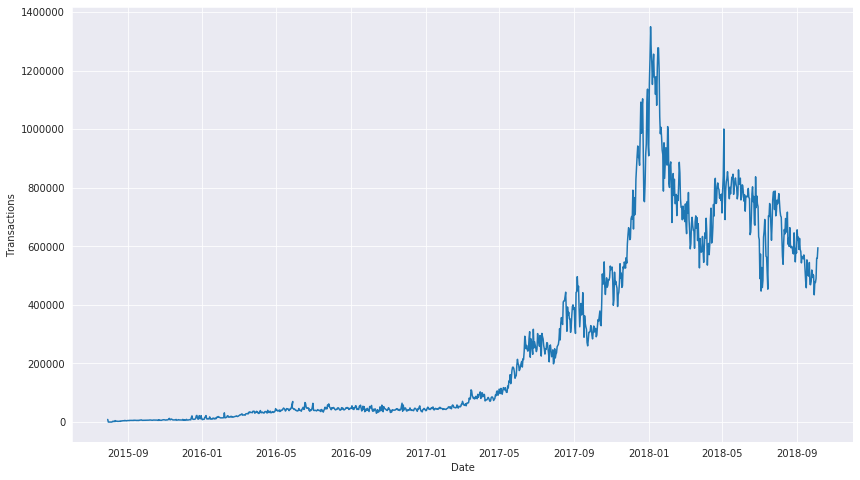

In [25]:
# what is the transaction rate?
plot_features(crypt_df, 'Date', 'Transactions', 14, 8)

The transaction rate on ethereum platform shows a very similar pattern as that of the market capitalization. The transaction rate was the highest when the market cap was also at the peak.

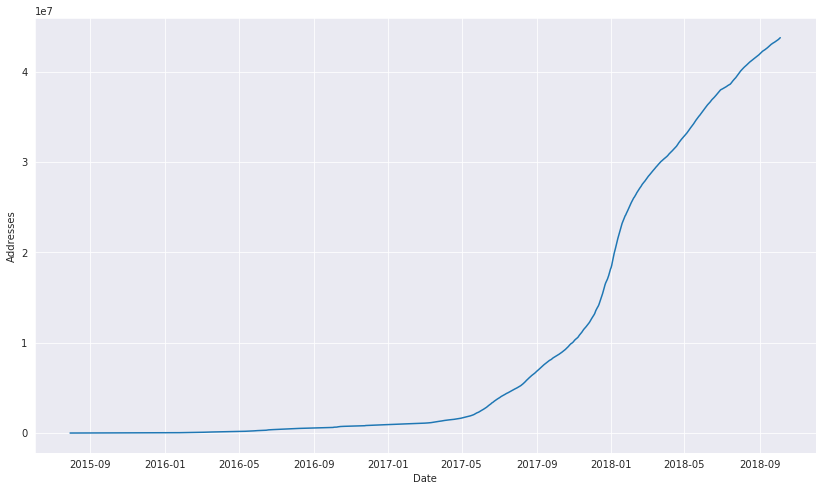

In [26]:
# is ethereum getting popular over time?
plot_features(crypt_df, 'Date', 'Addresses', 14, 8)

The data suggests that ethereum has seen a steady increase in the total number of users over time. 

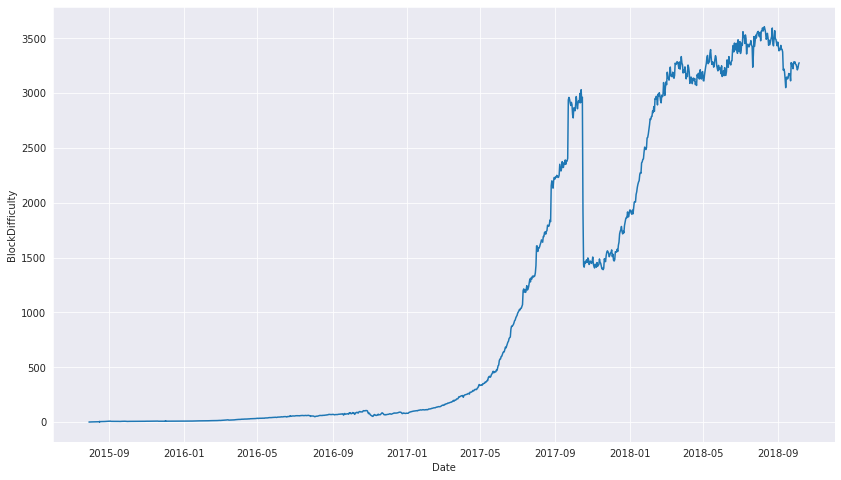

In [27]:
# how difficult is it getting to mine a block?
plot_features(crypt_df, 'Date', 'BlockDifficulty', 14, 8)

Therefore on average, the mining difficulty associated with blocks in the ethereum space has incresed over time. This, in turn, keeps the total circulation of cryptocurrencies in check. In this context, it is interesting to see how the incentives of miners (*i.e.*, block rewards) has changed ovet time.

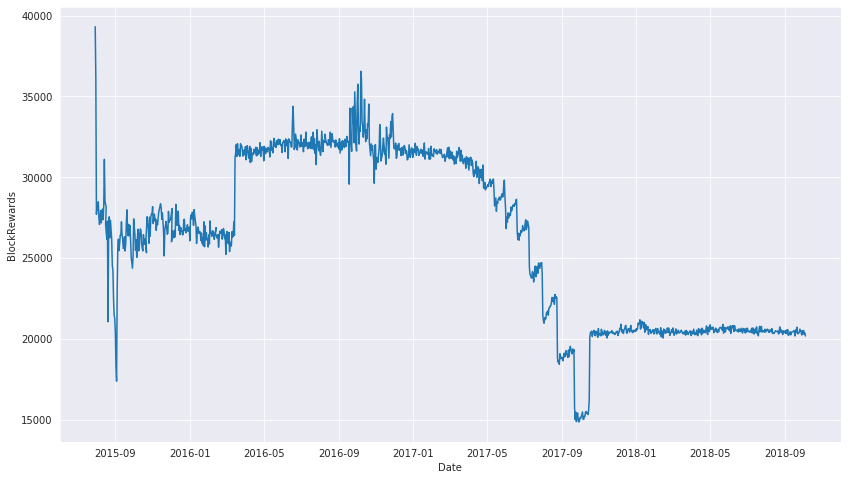

In [28]:
# block rewards as a funtion of time
plot_features(crypt_df, 'Date', 'BlockRewards', 14, 8)

The block rewards given to a miner for mining a block has decreased over time. From the end of the year 2017 till the end of 2018, it has remained steady at the value 20k (in ether unit). The lowest (in the available data period) so far has been around 15k.

Now, the value of block reward includes the total block reward issued by the protocol combined with the fees/gas paid by all the transactions included in this block (https://docs.ethhub.io/using-ethereum/mining/). The gas price for each transaction is set by users. Can we use this information to find out what is actually causing the decline in block reward?

Text(0, 0.5, 'GasPriceHistory')

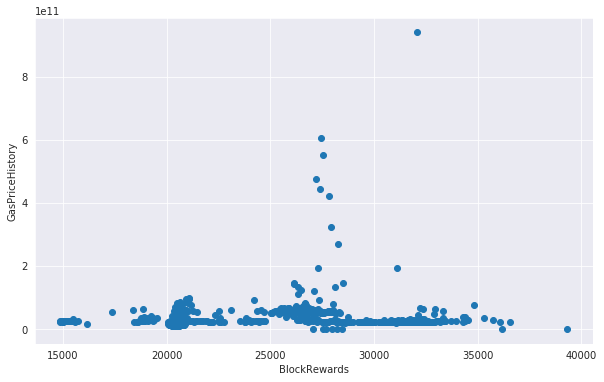

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(x='BlockRewards', y='GasPriceHistory', data=crypt_df)
plt.xlabel('BlockRewards')
plt.ylabel('GasPriceHistory')

Clearly, over the entire available block reward range, there is not much fluctuation in the gas price. So it might be indicative that rewards issued by the protocol itself has decreased over time.

Text(0, 0.5, 'BlockSize')

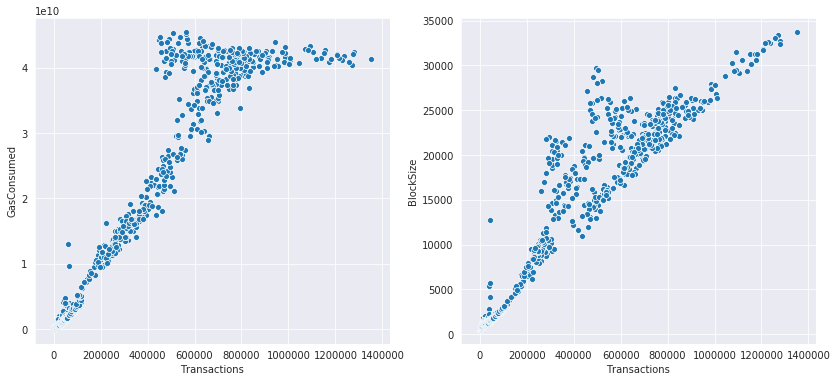

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(14,6), sharex=True)
sns.scatterplot(x='Transactions', y='GasConsumed', data=crypt_df, ax=ax[0])
sns.scatterplot(x='Transactions', y='BlockSize', data=crypt_df, ax=ax[1])
ax[0].set_xlabel('Transactions')
ax[0].set_ylabel('GasConsumed')
ax[1].set_ylabel('BlockSize')

The amount of gas consumed in each transaction seems to have an upper limit around 4.5 * 1e10 (in ether unit). The right plot is quite straightforward. It tells us that the block size increases with increment in the number of transactions. 

Text(0, 0.5, 'BlockDifficulty')

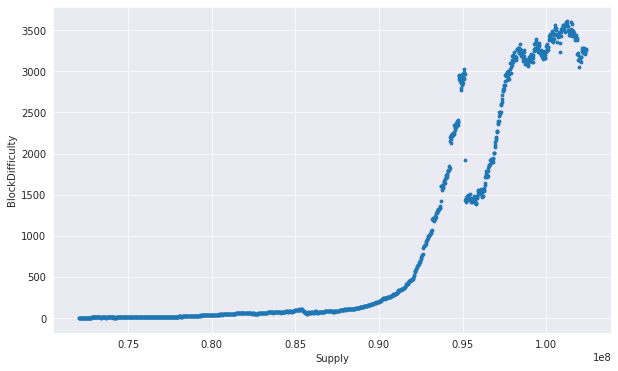

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(x='Supply', y='BlockDifficulty', data=crypt_df, s=8)
plt.xlabel('Supply')
plt.ylabel('BlockDifficulty')

The difficulty in mining a block has increased with the total supply of ethereum cryptocurrencies in the market. Let's now find out how different features are correlated with each other.

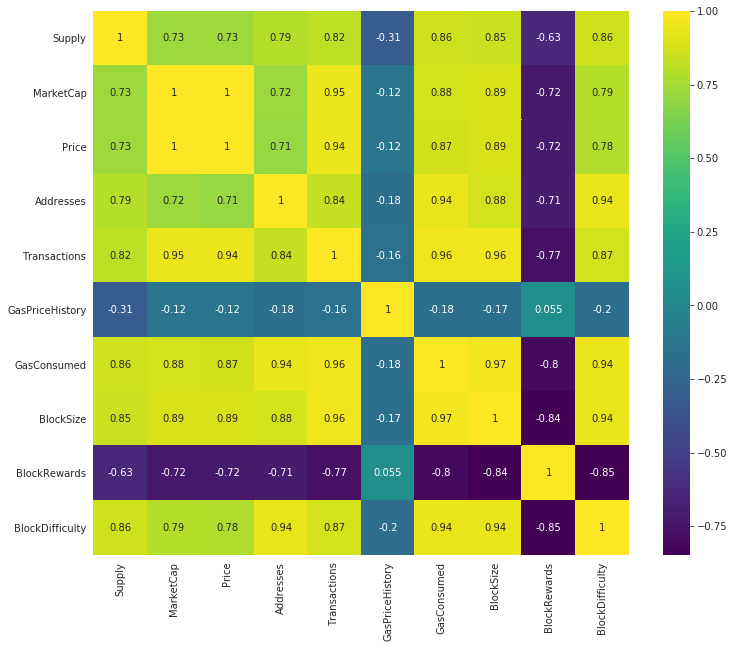

In [21]:
# construct the correlation matrix
corr_df = crypt_df.corr()

# visualize it using a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_df, cmap="viridis", annot=True)

'MarketCap' has a perfect correlation with 'Price'. This is not surprising since market capital is calculated using the formula (total supply in market * price). This feature also has a high correlation with features like 'Transactions' (the more transactions made on ethereum network, the more is the capital value), 'Addresses' (as more people get involved, more transactions are made and hence more capital value), 'GasConsumed', 'BlockSize' (since these two features are directly proportional to 'Transactions'). Interestingly, 'MarketCap' and 'BlockRewards' are negatively correlated. Infact, the feature 'BlockRewards' is negatively correlated with most of the features. Another interesting observation is that 'GasPriceHistory' is almost independent of the features present in our current dataset.

## Model building

In this section, we build a simple regression model to predict the market capital value of ethereum given a set of features. Since 'MarketCap' (the target feature) and 'Price' show perfect correlation, we drop the feature 'Price' from our feature matrix. We also drop the 'Date' column since it is not a feature in true sense and can be thought of as index associated with each data sample. This feature, however, would have been important if we were doing a time series analysis.

Let's define our feature matrix and target variable.

In [83]:
# feature matrix
X = crypt_df.drop(['Date', 'Price', 'MarketCap'], axis=1) 

# target variable
y = crypt_df['MarketCap'].values

In [84]:
# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("The shape of the training dataset is : {}".format(X_train.shape))
print("The shape of the test dataset is : {}".format(X_test.shape))

The shape of the training dataset is : (931, 8)
The shape of the test dataset is : (233, 8)


In [85]:
print('The minimum and maximum values in our target variable are {} and {} respectively.'.format(y_train.min(), y_train.max()))

The minimum and maximum values in our target variable are 0.0 and 134295.8144 respectively.


We now scale our datasets in such a way so that each entry lies between 0 and 1. Since the target variable has a wide range of values, we apply feature scaling on it as well.

In [86]:
# scaler object for the feature matrix
input_scaler = MinMaxScaler()
# scaler object for the target variable
output_scaler = MinMaxScaler()

# scaling the feature matrix
X_train_scaled = input_scaler.fit_transform(X_train)
X_test_scaled = input_scaler.transform(X_test)

# scaling the target variable
y_train_scaled = output_scaler.fit_transform(y_train.reshape(-1,1))
y_test_scaled = output_scaler.transform(y_test.reshape(-1,1))

It is now time to build our regression model and we start with a simple linear regression model. Note that, this is a multiple regression problem since we have more than one feature in our dataset. It might be the case that not all features are statistically significant and thus have potential impact on the target. In that situation, we can remove the statistically insignificant features and work only with a subset of fetaure matrix.

Let's first find out if there is any statistically insignificant feature in the data. We apply the backward elimination method (https://medium.com/@mayankshah1607/machine-learning-feature-selection-with-backward-elimination-955894654026) and set the significance level at 0.05.

In [87]:
# add the constant term to our multiple linear regression equation : y = b0 + b1*x1 + b2*x2 + ..... + bn*xn
X_new = np.append(np.ones(shape=(X_train_scaled.shape[0], 1)).astype(int), X_train_scaled, axis=1)
X_new.shape

(931, 9)

In [91]:
def backward_elimination(target, feat_mat, significance_level=0.05):
    
    """
    
    
    """
    
    # start with the entire feature matrix
    feat_opt = feat_mat[:, 0:]
    
    # apply backward elimination
    regressor_OLS = sm.OLS(endog=target, exog=feat_opt).fit()
    
    # store the result summary
    ols_summary = regressor_OLS.summary()
    
    # extract the stat table from the summary and convert to a html file
    results_as_html = summary.tables[1].as_html()
    
    # convert the html file to a pandas dataframe and print it
    stat_df = pd.read_html(results_as_html, header=0, index_col=0)[0]
    print("The statiscal summary is :")
    print(stat_df)
    
    # what is the max p-value
    max_pval = stat_df['P>|t|'].max()
    print()
    print("The maximum p value is : {}".format(max_pval))
    
    # if the highest p-value exceeds the significance limit, drop the corresponding feature
    if max_pval > significance_level:
        # print the insignificant feature
        feat_max_pval = X.columns[np.where(stat_df['P>|t|'] == max_pval)[0][0] - 1]
        print("The feature with maximum p-value : {}".format(feat_max_pval))
        # remove it from the original array
        feat_opt = np.delete(feat_opt, np.where(stat_df['P>|t|'] == max_pval)[0][0], axis=1)
        return feat_opt
    # otherwise return the original array
    else:
        return feat_opt

In [92]:
X_opt_1 = backward_elimination(target=y_train_scaled, feat_mat=X_new)

The statiscal summary is :
         coef  std err       t  P>|t|  [0.025  0.975]
const -0.0695    0.014  -5.091   0.00  -0.096  -0.043
x1    -0.1123    0.016  -7.072   0.00  -0.143  -0.081
x2    -0.3277    0.030 -11.098   0.00  -0.386  -0.270
x3     1.1572    0.044  26.558   0.00   1.072   1.243
x4     0.0737    0.039   1.880   0.06  -0.003   0.151
x5     0.0570    0.042   1.343   0.18  -0.026   0.140
x6    -0.2521    0.040  -6.279   0.00  -0.331  -0.173
x7     0.1306    0.024   5.455   0.00   0.084   0.178
x8     0.3504    0.029  11.968   0.00   0.293   0.408

The maximum p value is : 0.18


In [90]:
# start with the entire feature matrix
X_opt = X_new[:, [0,1,2,3,4,5,6,7,8]]

# apply backward elimination
regressor_OLS = sm.OLS(endog=y_train_scaled, exog=X_opt).fit()

# print the summary
summary = regressor_OLS.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1484.
Date:                Sun, 02 Aug 2020   Prob (F-statistic):               0.00
Time:                        12:16:48   Log-Likelihood:                 1371.3
No. Observations:                 931   AIC:                            -2725.
Df Residuals:                     922   BIC:                            -2681.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0695      0.014     -5.091      0.0

In [78]:
X_new[0, :]

array([1.        , 0.98048415, 0.96603618, 0.46445044, 0.0134167 ,
       0.88519092, 0.75028696, 0.22383772, 0.9527016 ])

In [61]:
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-0.0661,0.014,-4.726,0.000,-0.094,-0.039
x1,-0.1130,0.017,-6.810,0.000,-0.146,-0.080
x2,-0.3652,0.030,-12.227,0.000,-0.424,-0.307
x3,1.1093,0.043,25.874,0.000,1.025,1.193
x4,0.0534,0.037,1.446,0.149,-0.019,0.126
x5,0.1243,0.043,2.894,0.004,0.040,0.209
x6,-0.2698,0.038,-7.019,0.000,-0.345,-0.194
x7,0.1262,0.025,5.108,0.000,0.078,0.175
x8,0.3612,0.030,11.993,0.000,0.302,0.420


In [65]:
results_as_html = summary.tables[1].as_html()
# convert to a pandas dataframe
stat_df = pd.read_html(results_as_html, header=0, index_col=0)[0]
stat_df

,coef,std err,t,P>|t|,[0.025,0.975]
const,-0.0661,0.014,-4.726,0.000,-0.094,-0.039
x1,-0.1130,0.017,-6.810,0.000,-0.146,-0.080
x2,-0.3652,0.030,-12.227,0.000,-0.424,-0.307
x3,1.1093,0.043,25.874,0.000,1.025,1.193
x4,0.0534,0.037,1.446,0.149,-0.019,0.126
x5,0.1243,0.043,2.894,0.004,0.040,0.209
x6,-0.2698,0.038,-7.019,0.000,-0.345,-0.194
x7,0.1262,0.025,5.108,0.000,0.078,0.175
x8,0.3612,0.030,11.993,0.000,0.302,0.420


In [75]:
stat_df['P>|t|'].max()

0.149

In [74]:
np.where(stat_df['P>|t|'] == stat_df['P>|t|'].max())[0][0]

4

In [66]:
# start with the entire feature matrix
X_opt = X_new[:, [0,1,2,3,5,6,7,8]]

# apply backward elimination
regressor_OLS = sm.OLS(endog=y_train_scaled, exog=X_opt).fit()

# print the summary
summary = regressor_OLS.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     1577.
Date:                Sun, 02 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:43:21   Log-Likelihood:                 1344.6
No. Observations:                 931   AIC:                            -2673.
Df Residuals:                     923   BIC:                            -2635.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0605      0.013     -4.499      0.0

In [17]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
pred = model.predict(X_test_scaled)

In [19]:
rmse_test = mean_squared_error(y_true=y_test_scaled, y_pred=pred, squared=False)
r2_test = r2_score(y_test_scaled, pred)
rmse_test, r2_test

(0.057238823663354574, 0.9255858770162446)

In [21]:
rmse_train = mean_squared_error(y_true=y_train_scaled, y_pred=model.predict(X_train_scaled), squared=False)
r2_train = r2_score(y_train_scaled, model.predict(X_train_scaled))
rmse_train, r2_train

(0.05594893935736097, 0.925083932413406)

In [25]:
model.coef_.shape

(1, 8)

In [29]:
X.columns

Index(['Supply', 'Addresses', 'Transactions', 'GasPriceHistory', 'GasConsumed',
       'BlockSize', 'BlockRewards', 'BlockDifficulty'],
      dtype='object')

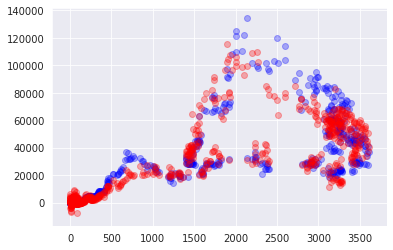

In [87]:
plt.scatter(X_train.iloc[:, [7]], y_train, color='blue', alpha=0.3)
plt.scatter(X_train.iloc[:, [7]], model.predict(X_train), color='red', alpha=0.3)

In [95]:
X_train.head()

,Supply,Addresses,Transactions,GasPriceHistory,GasConsumed,BlockSize,BlockRewards,BlockDifficulty
867,96322483.91,14409069,909631,3.863150e+10,41625003479,26216,20606.34375,1612.737
619,90567128.63,1453300,74557,2.196366e+10,2602180314,2358,30242.03125,253.175
355,82150765.50,455066,44184,2.181738e+10,1362771496,1502,31773.90625,60.393
45,73225627.22,21252,6057,5.231352e+10,177583552,764,26171.40625,7.022
1003,99109892.84,32638912,775321,1.758246e+10,37348503833,24555,20268.00000,3128.856


In [31]:
poly_feat = PolynomialFeatures(degree=2)
X_train_poly = poly_feat.fit_transform(X_train_scaled)
X_test_poly = poly_feat.transform(X_test_scaled)

In [32]:
X_train_poly.shape

(931, 45)

In [33]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
poly_pred = poly_reg.predict(X_test_poly)

In [35]:
rmse_train_poly = mean_squared_error(y_true=y_train_scaled, y_pred=poly_reg.predict(X_train_poly), squared=False)
r2_train_poly = r2_score(y_train_scaled, poly_reg.predict(X_train_poly))
rmse_train_poly, r2_train_poly

(0.034433752557249515, 0.9716234256637841)

In [36]:
rmse_test_poly = mean_squared_error(y_true=y_test_scaled, y_pred=poly_pred, squared=False)
r2_test_poly = r2_score(y_test_scaled, poly_pred)
rmse_test_poly, r2_test_poly

(0.03378014915145981, 0.9740822620993153)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              MarketCap   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     1791.
Date:                Sat, 01 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:04:20   Log-Likelihood:                -12044.
No. Observations:                1164   AIC:                         2.411e+04
Df Residuals:                    1155   BIC:                         2.415e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.749e+04   4486.498      3.899      0.000    8690.700    2.63e+04
x1            -0.0005   6.48e-05     -8.106      0.000      -0.001      -0.000
x2            -0.0011   8.07e-05    -13.362      0.000      -0.001      -0.001
x3             0.1148      0.004     30.243      0.000       0.107       0.122
x4          1.055e-08   5.14e-09      2.052      0.040    4.62e-10    2.06e-08
x5          2.354e-07   1.12e-07      2.097      0.036    1.51e-08    4.56e-07
x6            -1.0753      0.139     -7.737      0.000      -1.348      -0.803
x7             0.7579      0.118      6.401      0.000       0.526       0.990
x8            13.6490      0.983     13.885      0.000      11.720      15.578
==============================================================================
Omnibus:                      310.027   Durbin-Watson:                   0.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1842.825
Skew:                           1.091   Prob(JB):                         0.00
Kurtosis:                       8.765   Cond. No.                     1.17e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [120]:
pred_dt = model_dt.predict(X_test)

In [121]:
rmse_train_dt = np.sqrt(mean_squared_error(y_true=y_train, y_pred=model_dt.predict(X_train), squared=False))
r2_train_dt = r2_score(y_train, model_dt.predict(X_train))
rmse_train_dt, r2_train_dt

(0.0, 1.0)

In [124]:
rmse_test_dt = np.sqrt(mean_squared_error(y_true=y_test, y_pred=pred_dt))
r2_test_dt = r2_score(y_test, pred_dt)
rmse_test_dt, r2_test_dt

(4074.0794216532054, 0.9806111692473931)